In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image
from IPython.core.display import HTML

# from ../project_common import ProjectCommon
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from project_common import ProjectCommon

In [3]:
df = pd.read_csv('../data/Speed Dating Data.csv')
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


## Let's have a look at what people think of themselves

In [4]:
cols = ['iid', 'pid', 'dec_o', 'match']
atts = ['attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3']
comb_df = df[atts+cols]
comb_df = comb_df.dropna(how='any')
comb_df = comb_df.groupby('iid').mean().reset_index()
comb_df.head()

,iid,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,pid,dec_o,match
0,1,5.0,7.0,7.0,7.0,7.0,15.5,0.5,0.4
1,2,7.0,6.0,9.0,9.0,4.0,15.5,0.6,0.2
2,4,6.0,5.0,6.0,8.0,5.0,15.5,0.6,0.2
3,5,4.0,5.0,10.0,6.0,10.0,15.5,0.3,0.2
4,11,7.0,8.0,7.0,7.0,5.0,5.5,0.4,0.0


In [5]:
print comb_df[['attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3']].mean()

attr3_3     7.193916
sinc3_3     8.091255
intel3_3    8.372624
fun3_3      7.623574
amb3_3      7.365019
dtype: float64


#### This confirms my suspicion that people rate their attractiveness lower than the other attributes, since that is easiest for other people to disagree with

## Now let's look at what people think of other people

In [6]:
other_atts = df[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']]

In [7]:
other_atts.mean()

attr_o     6.190411
sinc_o     7.175256
intel_o    7.369301
fun_o      6.400599
amb_o      6.778409
shar_o     5.474870
dtype: float64

## Use own attributes to predict how many people will say yes to you

#### We first run linear regression on the % of yeses someone will get. This has the issue of predicting someone will get a yes rate of greater than 1 or less than 0. To do this we compress the dataframe so that each row represents one participant, with the attribute values being the mean of all of the responses from their partner

In [8]:
cols = ['iid', 'pid', 'gender', 'dec_o', 'match']
atts = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o']
model_df = df[atts+cols]
model_df = model_df.dropna(how='all')
model_df = model_df.groupby('iid').mean()
model_df.reset_index(inplace=True)
# model_df.head()
# model_df.groupby('iid').agg()

In [9]:
model_df = model_df.sort_values('dec_o', axis=0, ascending=False)
model_df[model_df['iid']<=5]

,iid,attr_o,sinc_o,intel_o,fun_o,amb_o,pid,gender,dec_o,match
1,2,7.7,7.1,7.9,7.5,7.500000,15.5,0.0,0.6,0.2
3,4,7.0,7.1,7.7,7.5,7.700000,15.5,0.0,0.6,0.2
0,1,6.7,7.4,8.0,7.2,8.000000,15.5,0.0,0.5,0.4
2,3,6.5,7.1,7.3,6.2,7.111111,15.5,0.0,0.5,0.0
4,5,5.3,7.7,7.6,7.2,7.800000,15.5,0.0,0.3,0.2


In [10]:
# new = df[df['iid'] == 266]
# with pd.option_context('display.max_rows', None, 'display.max_columns', 80):
#     print new

In [11]:
X = model_df[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o']]
y = model_df['dec_o']

from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(X, y)
print ols.coef_
print ols.intercept_

[ 0.13134838 -0.0252001   0.03667657  0.05414844 -0.01931461]
-0.695696618146


In [22]:
## Enter in your attributes and get a prediction for your % success rate
you = {}
you['attr_o'] = 9; you['sinc_o'] = 2; you['intel_o'] = 8; you['fun_o'] = 8; you['amb_o'] = 6
you_X = pd.DataFrame(you, index=[0])
you_X = you_X[list(X.columns)]
preds = ols.predict(you_X)
print "the number of yeses you will get out of 20 speed dates is: ", preds[0]*20

the number of yeses you will get out of 20 speed dates is:  20.9350214907


#### Now we will run logistic regression using the original dataframe. Note that we are using each person's ratings of their partner's attributes, as opposed to some mean from everyone that their partner met that night (we will do that next)

In [13]:
all_reg = df[['iid', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'dec_o']]
all_reg = all_reg.dropna(how='any')
all_reg.head()

,iid,attr_o,sinc_o,intel_o,fun_o,amb_o,dec_o
0,1,6.0,8.0,8.0,8.0,8.0,0
1,1,7.0,8.0,10.0,7.0,7.0,0
2,1,10.0,10.0,10.0,10.0,10.0,1
3,1,7.0,8.0,9.0,8.0,9.0,1
4,1,8.0,7.0,9.0,6.0,9.0,1


In [14]:
X2 = all_reg[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o']]
y2 = all_reg['dec_o']
from sklearn.linear_model import LogisticRegression
ols2 = LogisticRegression()
ols2.fit(X2, y2)
print ols2.coef_
print ols2.intercept_


[[ 0.56357912 -0.08266301  0.02060651  0.35782786 -0.10976529]]
[-5.04488136]


In [15]:
you = {}
you['attr_o'] = 7; you['sinc_o'] = 2; you['intel_o'] = 9; you['fun_o'] = 9; you['amb_o'] = 6
you_X = pd.DataFrame(you, index=[0])
you_X = you_X[list(X.columns)]
preds = ols2.predict_proba(you_X)
print "the number of yeses you will get out of 20 speed dates is: ", preds[0][1]*20

the number of yeses you will get out of 20 speed dates is:  16.2979846914


#### Now we will run logistic regression on the whole dataset, but each person's attributes are obtained by taking the mean of what everyone thinks of their attributes

In [16]:
cols_to_use = ['iid', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'dec_o']
merged = all_reg.merge(model_df[cols_to_use], on=['iid'], suffixes=('_x', ''))
merged.drop(['attr_o_x', 'sinc_o_x', 'intel_o_x', 'fun_o_x', 'amb_o_x', 'dec_o'], axis=1, inplace=True)
merged.rename(columns={'dec_o_x': 'dec_o'}, inplace=True)
merged.head(20)

,iid,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o
0,1,0,6.7,7.4,8.0,7.2,8.0
1,1,0,6.7,7.4,8.0,7.2,8.0
2,1,1,6.7,7.4,8.0,7.2,8.0
3,1,1,6.7,7.4,8.0,7.2,8.0
4,1,1,6.7,7.4,8.0,7.2,8.0
5,1,1,6.7,7.4,8.0,7.2,8.0
6,1,0,6.7,7.4,8.0,7.2,8.0
7,1,0,6.7,7.4,8.0,7.2,8.0
8,1,1,6.7,7.4,8.0,7.2,8.0
9,1,0,6.7,7.4,8.0,7.2,8.0


In [17]:
X3 = merged[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o']]
y3 = merged['dec_o']
ols3 = LogisticRegression()
ols3.fit(X3, y3)
print ols3.coef_
print ols3.intercept_

[[ 0.64794258 -0.21894218  0.17992687  0.28570654 -0.16557815]]
[-4.82959914]


In [21]:
you = {}
you['attr_o'] = 4; you['sinc_o'] = 3; you['intel_o'] = 6; you['fun_o'] = 5; you['amb_o'] = 9
you_X = pd.DataFrame(you, index=[0])
you_X = you_X[list(X.columns)]
preds = ols3.predict_proba(you_X)
print "the number of yeses you will get out of 20 speed dates is: ", preds[0][1]*20

the number of yeses you will get out of 20 speed dates is:  2.65521849493


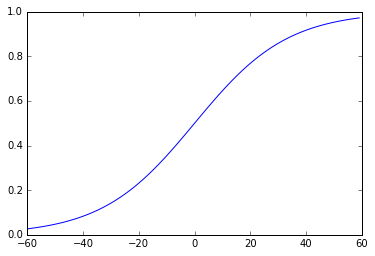

In [33]:
x = np.arange(-60, 60)
y = 1 / (1 + np.exp(-x * 0.06))
plt.plot(x, y)